<a href="https://colab.research.google.com/github/tanisha0303/Deep-Learning-Projects/blob/main/RESNET50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import zipfile
import seaborn as sb
import numpy as np # linear algebra
import pandas as pd # data processing
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.metrics import confusion_matrix,classification_report
from keras.optimizers import Adam


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
import os, re, random
import pandas as pd
import numpy as np
np.random.seed(2)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, Activation
from keras.optimizers import RMSprop
from keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Model

In [ ]:
from google.colab import drive
drive.mount('/drive')

In [ ]:
PATH="/drive/My Drive/Colab Notebooks/archive/"

In [ ]:
PATH_TRAIN= "/drive/My Drive/Colab Notebooks/archive/training_set/training_set/dogs_cats"
PATH_TEST="/drive/My Drive/Colab Notebooks/archive/test_set/test_set/dogs_cats"

In [ ]:
def prepare_data(dir_path):
    filenames = os.listdir(dir_path)
    labels = []
    for filename in filenames:
        label = filename.split('.')[0]
        if label == 'dog':
            labels.append(1)
        else:
            labels.append(0)
    return filenames,labels

#prepare data
train_filenames,train_labels = prepare_data(PATH_TRAIN)
test_filenames,test_labels = prepare_data(PATH_TEST)

df_train = pd.DataFrame({'filename':train_filenames,'class': train_labels})
df_test = pd.DataFrame({'filename': test_filenames,'class': test_labels})

In [ ]:
os.listdir(PATH_TEST)

['dog.4031.jpg',
 'dog.4027.jpg',
 'dog.4006.jpg',
 'cat.4998.jpg',
 'dog.4018.jpg',
 'dog.4029.jpg',
 'dog.4003.jpg',
 'dog.4010.jpg',
 'dog.4004.jpg',
 'dog.4028.jpg',
 'dog.4001.jpg',
 'dog.4026.jpg',
 'dog.4002.jpg',
 'dog.4030.jpg',
 'dog.4005.jpg',
 'cat.4993.jpg',
 'dog.4009.jpg',
 'cat.4995.jpg',
 'dog.4019.jpg',
 'dog.4038.jpg',
 'dog.4052.jpg',
 'dog.4057.jpg',
 'dog.4069.jpg',
 'dog.4044.jpg',
 'dog.4036.jpg',
 'dog.4075.jpg',
 'dog.4065.jpg',
 'dog.4041.jpg',
 'dog.4076.jpg',
 'dog.4046.jpg',
 'dog.4067.jpg',
 'dog.4059.jpg',
 'dog.4055.jpg',
 'dog.4040.jpg',
 'dog.4070.jpg',
 'dog.4049.jpg',
 'dog.4048.jpg',
 'dog.4051.jpg',
 'dog.4058.jpg',
 'dog.4056.jpg',
 'dog.4039.jpg',
 'dog.4066.jpg',
 'dog.4045.jpg',
 'dog.4037.jpg',
 'dog.4032.jpg',
 'dog.4035.jpg',
 'dog.4061.jpg',
 'dog.4074.jpg',
 'dog.4047.jpg',
 'dog.4033.jpg',
 'dog.4064.jpg',
 'dog.4068.jpg',
 'dog.4077.jpg',
 'dog.4062.jpg',
 'dog.4071.jpg',
 'dog.4060.jpg',
 'dog.4053.jpg',
 'dog.4034.jpg',
 'dog.4043.jpg

In [ ]:
df_train.tail()

,filename,class
8000,cat.1026.jpg,0
8001,cat.1018.jpg,0
8002,cat.1005.jpg,0
8003,cat.1030.jpg,0
8004,cat.10.jpg,0


In [ ]:
df_test.head()

,filename,class
0,dog.4031.jpg,1
1,dog.4027.jpg,1
2,dog.4006.jpg,1
3,cat.4998.jpg,0
4,dog.4018.jpg,1


In [ ]:
df_train.shape, df_test.shape

((8005, 2), (2023, 2))

Text(0.5, 1.0, 'Data Distribution')

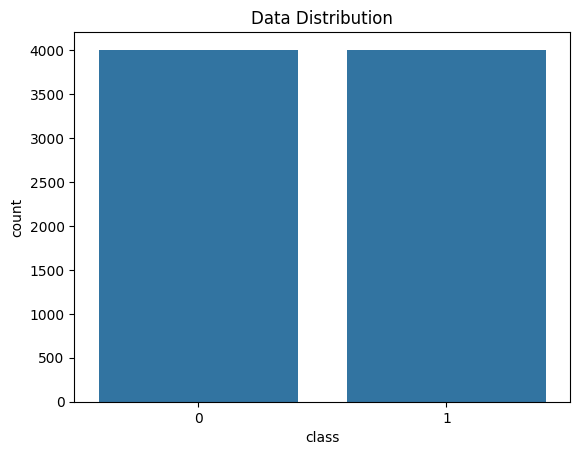

In [ ]:
import seaborn as sb
sb.countplot(x='class',data=df_train).set_title("Data Distribution")

In [ ]:

cats = df_train[df_train['class']==0][:3000]
dogs = df_train[df_train['class']==1][:3000]

df = pd.concat([cats,dogs])

df = df.sample(frac=1)
df.shape

(6000, 2)

In [ ]:
DIR_PATH=PATH_TRAIN
image_shape = (224,224)
epochs = 5
batch_size = 32
# to avoid type errors we cast df columns to string opjects
df['filename'] = df['filename'].astype('str')
df['class'] = df['class'].astype('str')
#split data ibto train and validation set
train, validation = train_test_split(df, test_size=0.2)
#reset indexes
train = train.reset_index()
validation = validation.reset_index()

#data augmenetation
train_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

#train generator
train_generator = train_gen.flow_from_dataframe(
    train,
    directory = DIR_PATH,
    x_col='filename',
    y_col="class",
    class_mode="categorical",
    target_size=image_shape,
    batch_size=batch_size)
#validation generator
validation_gen = ImageDataGenerator(
    rescale=1./255)
val_generator = validation_gen.flow_from_dataframe(
    validation,
    directory = DIR_PATH,
    x_col='filename',
    y_col="class",
    class_mode="categorical",
    target_size=image_shape,
    batch_size=batch_size)

Found 4800 validated image filenames belonging to 2 classes.
Found 1200 validated image filenames belonging to 2 classes.


Found 1 validated image filenames belonging to 1 classes.


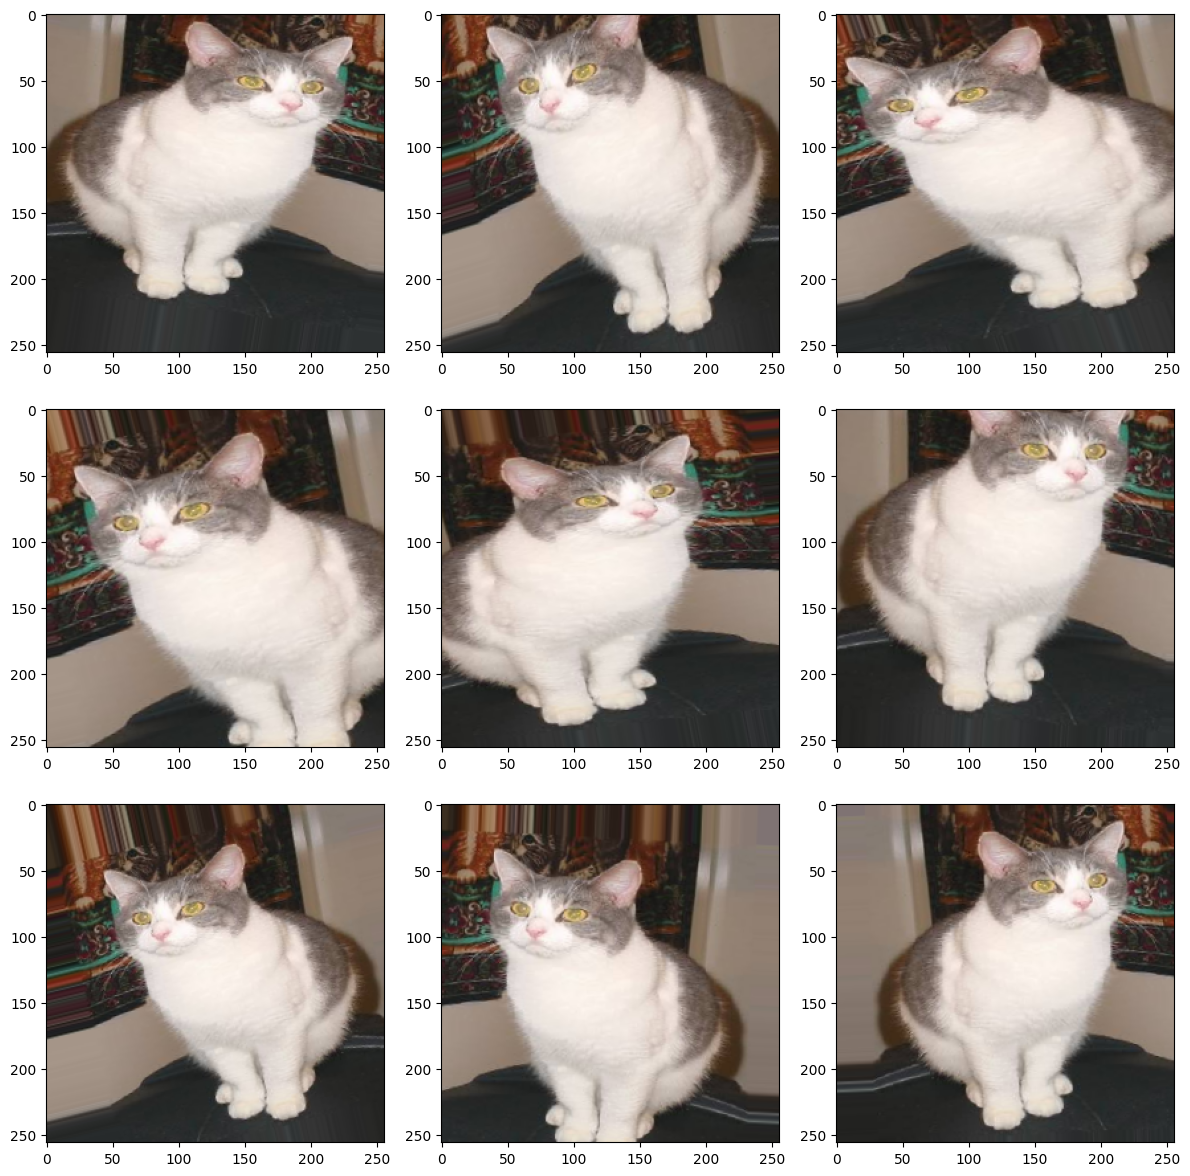

In [ ]:
sample_image= train.sample(n=1).reset_index(drop=True)
sample_generator = train_gen.flow_from_dataframe(
    sample_image,
    directory = DIR_PATH,
    x_col='filename',
    y_col='class')
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in sample_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
resnet = ResNet50(weights='imagenet',
                      input_shape= (224,224,3),
                      include_top= False)


#show the base model summary
resnet.summary()
#show how manay layers in the Resnet Network
layers = resnet.layers
print(f'Number of Layers: {len(layers)} ')

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
size_train = train.shape[0]
size_val = validation.shape[0]
callbacks = EarlyStopping(patience = 3, monitor='val_acc')

inputs = resnet.input
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(2, activation ='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

for layer in layers:
    layer.trainable = False
#Compile
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
    train_generator,
    epochs= epochs,
    validation_data = val_generator,
    validation_steps = size_val//batch_size,
    steps_per_epoch = size_train//batch_size,
    callbacks = [callbacks])

<ipython-input-18-83a1d0345874>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
150/150 [==============================] - ETA: 0s - loss: 0.7394 - accuracy: 0.5360

150/150 [==============================] - 211s 1s/step - loss: 0.7394 - accuracy: 0.5360 - val_loss: 0.6619 - val_accuracy: 0.6318
Epoch 2/5
150/150 [==============================] - ETA: 0s - loss: 0.6782 - accuracy: 0.5715

150/150 [==============================] - 91s 602ms/step - loss: 0.6782 - accuracy: 0.5715 - val_loss: 0.6719 - val_accuracy: 0.5557
Epoch 3/5
150/150 [==============================] - ETA: 0s - loss: 0.6777 - accuracy: 0.5708

150/150 [==============================] - 98s 656ms/step - loss: 0.6777 - accuracy: 0.5708 - val_loss: 0.6573 - val_accuracy: 0.6267
Epoch 4/5
150/150 [==============================] - ETA: 0s - loss: 0.6752 - accuracy: 0.5723

150/150 [==============================] - 89s 588ms/step - loss: 0.6752 - accuracy: 0.5723 - val_loss: 0.6615 - val_accuracy: 0.6106
Epoch 5/5
150/150 [==============================] - ETA: 0s - loss: 0.6711 - accuracy: 0.5927

150/150 [==============================] - 87s 579ms/step - loss: 0.6711 - accuracy: 0.5927 - val_loss: 0.6636 - val_accuracy: 0.6064


Text(0.5, 0, '#epochs')

<Figure size 640x480 with 0 Axes>

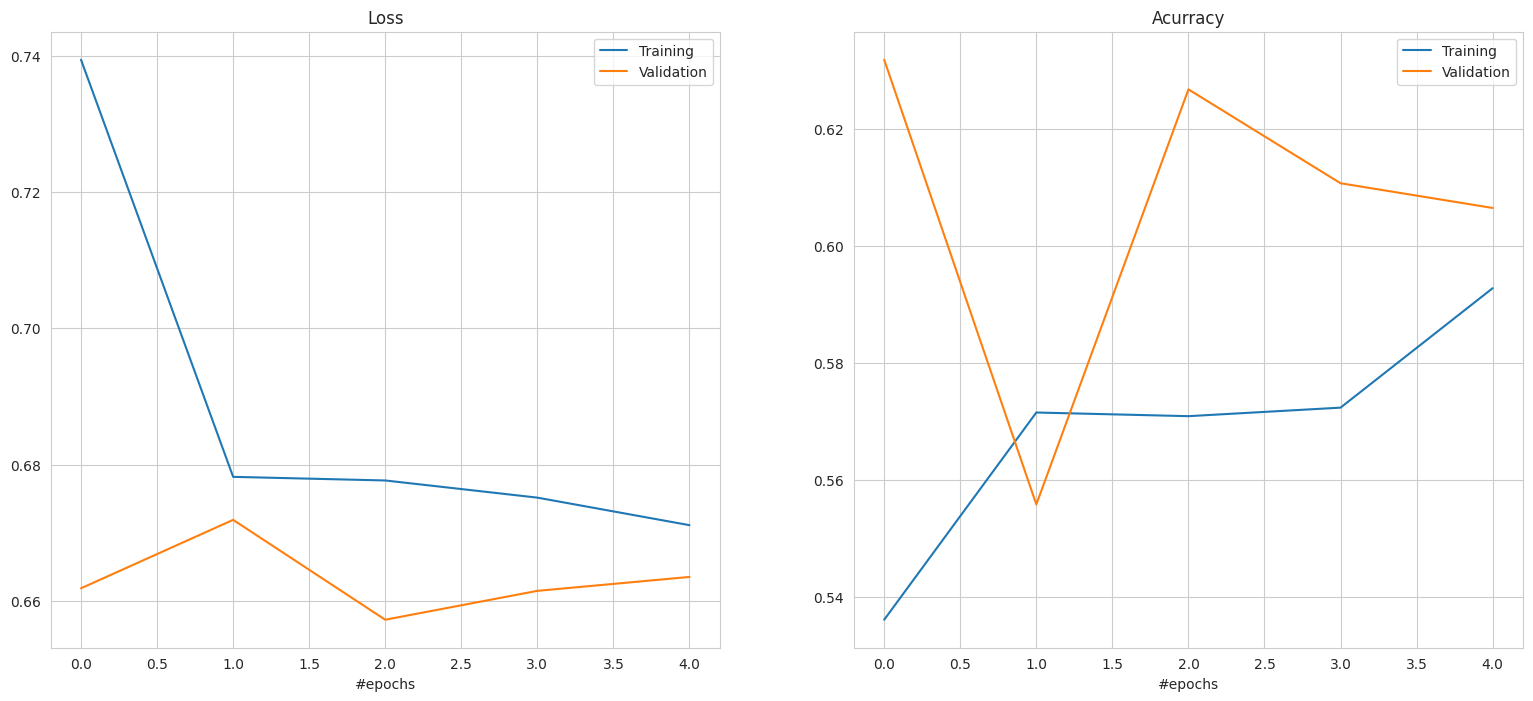

In [ ]:
sb.set_style('whitegrid')
plt.figure()
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(19,8))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['Training','Validation'])
ax1.set_title('Loss')
ax1.set_xlabel('#epochs')
## plot training accuracy vs validation accuracy
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['Training','Validation'])
ax2.set_title('Acurracy')
ax2.set_xlabel('#epochs')

In [ ]:
loss, acc = model.evaluate_generator(val_generator)
print("Validation Accuracy = %f \nValidation Loss = %f " % (acc, loss))

<ipython-input-20-0e035a6d6c8c>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = model.evaluate_generator(val_generator)


Validation Accuracy = 0.606667 
Validation Loss = 0.663123 


In [ ]:
model.save_weights("resnet_model.h5")
print("Model Saved.")

Model Saved.


<ipython-input-23-646e16187ed2>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict =  model.predict_generator(val_generator)


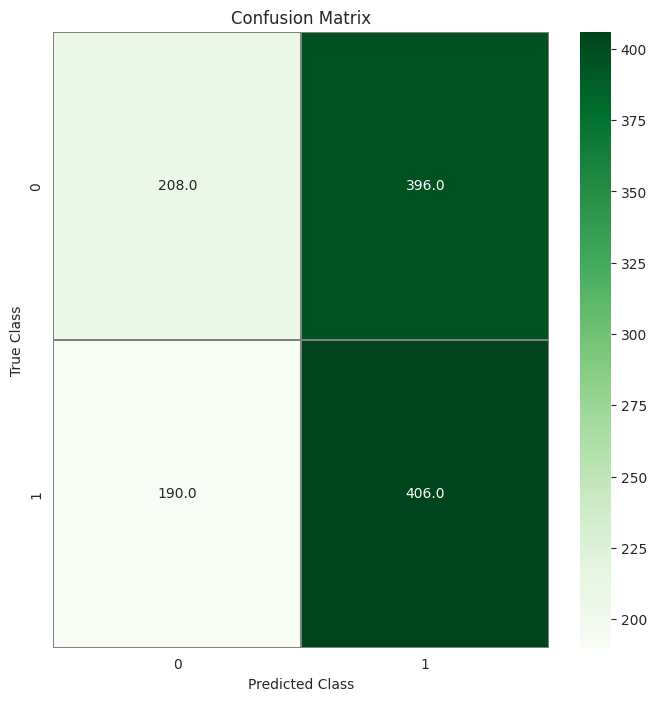

In [ ]:

labels = validation['class'].astype('int32')
predict =  model.predict_generator(val_generator)
predictions = np.where(predict > 0.5, 1,0)
predictions = np.argmax(predictions, axis=1)
#show the confusion matrix
conf_matrix = confusion_matrix(labels, predictions)
# plot the confusion matrix
fig,ax = plt.subplots(figsize=(8, 8))
sb.heatmap(conf_matrix, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

Predicting on test data

In [ ]:
df_test

,filename,class
0,dog.4031.jpg,1
1,dog.4027.jpg,1
2,dog.4006.jpg,1
3,cat.4998.jpg,0
4,dog.4018.jpg,1
...,...,...
2018,cat.4037.jpg,0
2019,cat.4036.jpg,0
2020,cat.4028.jpg,0
2021,cat.4020.jpg,0


In [ ]:
test_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)


test_generator = test_gen.flow_from_dataframe(
    df_test,
    directory = PATH_TEST,
    x_col='filename',
    y_col="class",
    class_mode=None,
    target_size=image_shape,
    batch_size=batch_size)


Found 2023 validated image filenames.


In [ ]:
samples=df_test.shape
samples

(2023, 2)

In [ ]:
print(type(samples))

<class 'tuple'>


In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(samples[0]/batch_size))

<ipython-input-48-c01794358cd2>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(samples[0]/batch_size))


In [ ]:
predict

array([[0.5335397 , 0.46646032],
       [0.541854  , 0.45814598],
       [0.5144413 , 0.4855587 ],
       ...,
       [0.5260922 , 0.47390786],
       [0.39440772, 0.60559225],
       [0.52693903, 0.473061  ]], dtype=float32)

In [ ]:
arr=[]
for i in range(len(predict)):
  arr.append(predict[i][0])

In [ ]:
arr_df=pd.DataFrame(arr)

In [ ]:
threshold=0.5
a=np.where(arr_df>threshold,1,0)
a

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
import sklearn

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(a,df_test['class'])

NameError: name 'confusion_matrix' is not defined